In [45]:
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
from src.estimator.scalar_mean import ScalarMeanClient
from src.server import Server

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
N = 5
clients = []

mus = np.random.normal(10, 2, (N, 1))
num_samples = np.random.randint(10, 100, N)

for i in range(N):
    clients.append(ScalarMeanClient(i, num_samples[i], mus[i].reshape(1, 1), lambda x: 1 / (1 + x)))
    
server = Server(clients)

In [47]:
server.aggregate()

{'server_est': array([[3.56304255e-11],
        [2.94948934e-11],
        [4.56168452e-11],
        [2.74935168e-11],
        [3.92736687e-11]]),
 'MSE_var': 21.72434181263028,
 'MSE_W': 0.044663097762092006,
 'MSE_est': 69.37698283358243}

In [48]:
server.gains()

(array([-0.89859231, -0.11898051, -0.95077456, -0.95336628, -0.77784195]),
 array([ 0.06152462,  0.83444481, -0.00302865,  0.00872465,  0.17976038]))

In [49]:
data = {
    'Client id': list(range(N)),
    'Gain': server.gains()[1],
    'Samples': num_samples,
    'Variance': server.esti_var.squeeze(axis=1)
}
closeness = np.linalg.

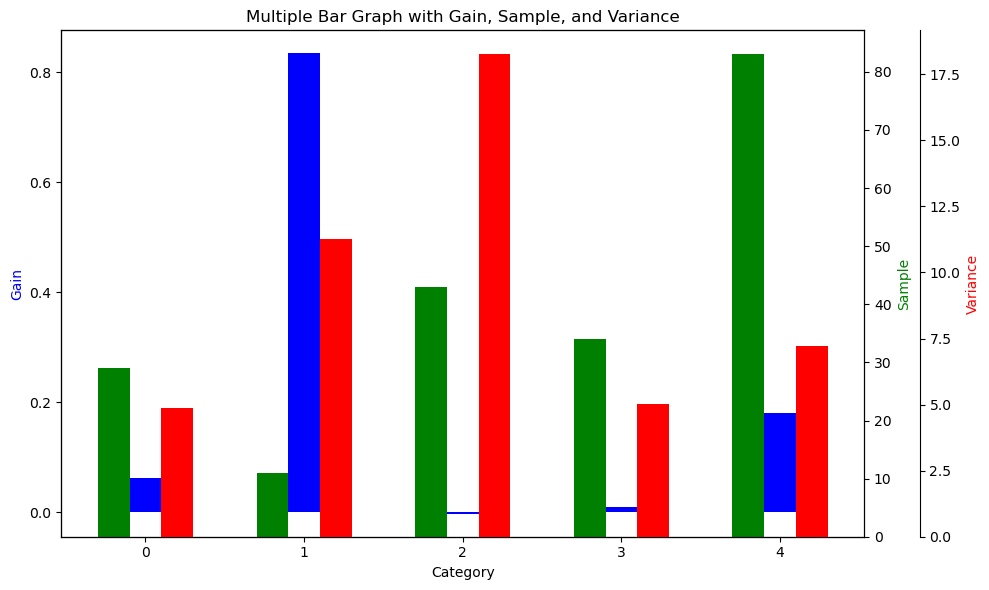

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Category': list(range(N)),
    'Gain': server.gains()[1],
    'Sample': num_samples,
    'Variance': server.esti_var.squeeze(axis=1)
}

# Convert data to pandas DataFrame
df = pd.DataFrame(data)

# Initialize the figure and first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set the label for the first y-axis
ax1.set_ylabel('Gain', color='blue')

# Calculate the x-coordinates for the bars
x = range(len(df['Category']))

# Plot the first metric (Gain)
ax1.bar(x, df['Gain'], color='blue', width=0.2, align='center', label='Gain')

# Create second y-axis for Sample
ax2 = ax1.twinx()
ax2.set_ylabel('Sample', color='green')
ax2.bar([i - 0.2 for i in x], df['Sample'], color='green', width=0.2, align='center', label='Sample')

# Create third y-axis for Variance
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))
ax3.set_ylabel('Variance', color='red')
ax3.bar([i + 0.2 for i in x], df['Variance'], color='red', width=0.2, align='center', label='Variance')

# Adjust layout
plt.title('Multiple Bar Graph with Gain, Sample, and Variance')
ax1.set_xlabel('Category')
plt.xticks(x, df['Category'])  # Set the category labels on x-axis

plt.tight_layout()
plt.show()
